# Functional Dependence of Interaction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import odeint
from IPython.display import display, Markdown
from tqdm import tqdm

init_printing()

In [2]:
x, y, α, β, γ, δ, σ, η, λ, x0 = symbols('x y alpha beta gamma delta sigma eta lambda x_0')

In [3]:
xdot = α*y*(1-x) + β*x*(1-x)
ydot = γ*y*(1-y) - δ*x*y

xdot = xdot.subs(β, -η*(x0-x))

z0 = solve([xdot, ydot],(x,y))

J = Matrix([
    [diff(xdot,x), diff(xdot,y)],
    [diff(ydot,x), diff(ydot,y)]
])

J0 = [J.subs([(x,z0[i][0]), (y,z0[i][1])]) for i in range(len(z0))]

nulcline_x = solve(xdot,y)
nulcline_y = solve(ydot,y)

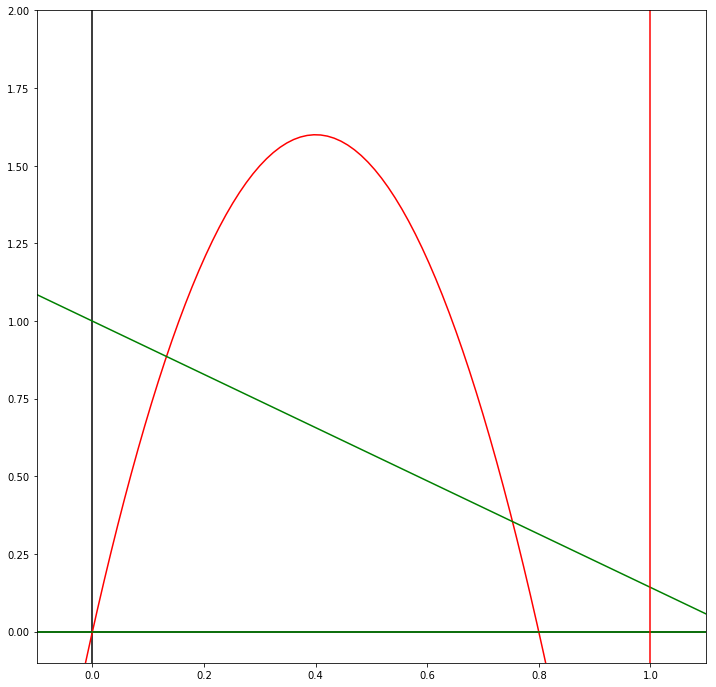

In [4]:
plt.figure(figsize=(12,12))

plt.axvline(0,color='k')
plt.axhline(0,color='k')

xx = np.linspace(-0.1,1.1,100)
yy1 = np.zeros(len(xx))
yy2 = np.zeros(len(xx))

for ii in range(len(np.linspace(-0.1,1.1,100))):
    yy1[ii] = nulcline_x[0].subs([(x,xx[ii]), (α,0.1), (x0,0.8), (η,1)])
    yy2[ii] = nulcline_y[1].subs([(x,xx[ii]), (γ,0.035), (δ,0.03)])

plt.plot(xx,yy1,'r')
plt.plot(xx,yy2,'g')
plt.axhline(0, color='g')
plt.axvline(1, color='r')

plt.xlim((-0.1,1.1))
plt.ylim((-0.1,2))

plt.show()

In [5]:
def ode_sys(zz, t, α, η, γ, δ, x0):
    
    xx = α*(1-zz[0])*zz[1] - η*(x0-zz[0])*zz[0]*(1-zz[0])
    yy = γ*zz[1]*(1-zz[1]) - δ*zz[0]*zz[1]
    
    return [xx,yy]

In [6]:
def set_system_parameters(α=0.1, η=1, γ=0.025, δ=0.035, x0=0.8):
    return { 'α': α, 'η': η, 'γ': γ, 'δ': δ, 'x0': x0 }

In [7]:
def set_integration_parameters(tf=1000, dt=1.0, x0=0.9, y0=0.1):
    return { 'tf': tf, 'dt': dt, 'x0': x0, 'y0': y0 }

In [8]:
def numeric_simulation(sys_params, int_params):
    t = np.arange(0, int_params['tf'], int_params['dt'])
    z0 = [int_params['x0'], int_params['y0']]
    p = (sys_params['α'], sys_params['η'], sys_params['γ'], sys_params['δ'], sys_params['x0'])
    sol = odeint(ode_sys, z0, t, args = p)
    return(t, sol)

In [23]:
xgrid = np.linspace(0,1,1000)
ygrid = np.linspace(0,1,1000)

basin_x = np.zeros((len(xgrid), len(ygrid)))
basin_y = np.zeros((len(xgrid), len(ygrid)))

for i in tqdm(range(len(xgrid))):
    for j in range(len(ygrid)):
        
        sys_p = set_system_parameters()
        int_p = set_integration_parameters(x0=xgrid[i], y0=ygrid[j])
        t, sol = numeric_simulation(sys_p, int_p)
        
        basin_x[i,j] = sol[-1,0]
        basin_y[i,j] = sol[-1,1]
        

100%|██████████| 1000/1000 [1:11:26<00:00,  2.62s/it]


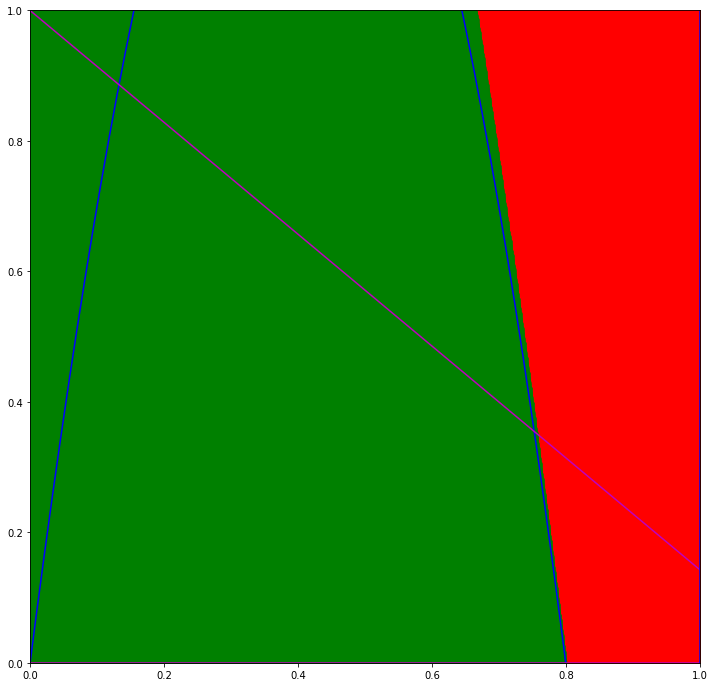

In [67]:
reward = sys_p['δ']*basin_x*basin_y
low_reward_list = np.where(reward < 0.001)
high_reward_list = np.where(reward > 0.0001)


plt.figure(figsize=(12,12))
plt.plot(low_reward_list[0]/len(xgrid), low_reward_list[1]/len(ygrid), '.r')
plt.plot(high_reward_list[0]/len(xgrid), high_reward_list[1]/len(ygrid), '.g')

xx = np.linspace(-0.1,1.1,100)
yy1 = np.zeros(len(xx))
yy2 = np.zeros(len(xx))

for ii in range(len(np.linspace(-0.1,1.1,100))):
    yy1[ii] = nulcline_x[0].subs([(x,xx[ii]), (α,0.1), (x0,0.8), (η,1)])
    yy2[ii] = nulcline_y[1].subs([(x,xx[ii]), (γ,0.035), (δ,0.03)])

plt.plot(xx,yy1,'b')
plt.plot(xx,yy2,'m')
plt.axhline(0, color='m')
plt.axvline(1, color='b')

# for i in range(len(z0)):
#     plt.plot(z0[i][0], z0[i][1], '.', color='C'+str(i))

plt.xlim((0,1))
plt.ylim((0,1))

plt.show()

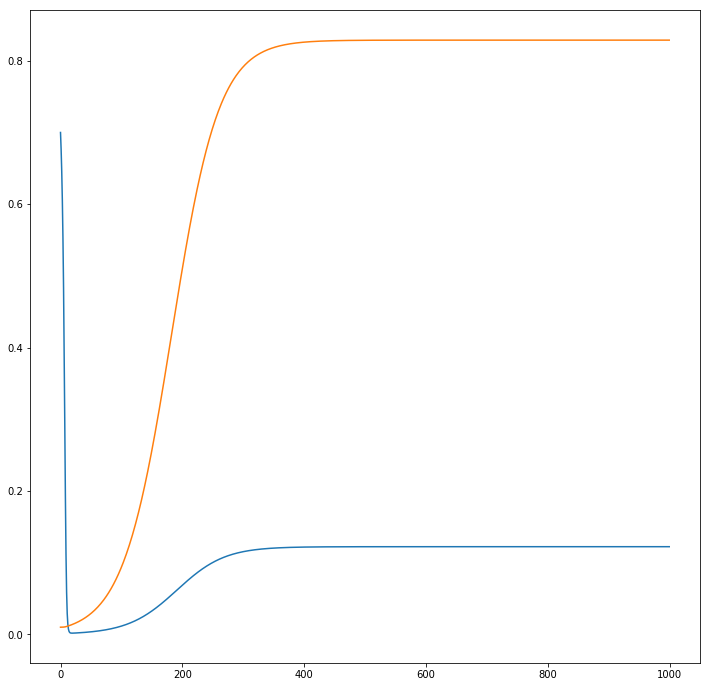

In [60]:
plt.figure(figsize=(12,12))
sys_p = set_system_parameters()
int_p = set_integration_parameters(x0=0.7,y0=0.01)
t, sol = numeric_simulation(sys_p, int_p)
plt.plot(t,sol[:,0])
plt.plot(t,sol[:,1])
plt.show()